# Optimization

## Subproject 1: Code an optimizer to solve the Eggholder and Levi13 functions

* The goal of this project is to optmize the Eggholder and Levi13 functions.
* Feel free to implement any of the algorithms we mentioned in the class
* Ideally, implement two of them and compare the results
* If two algorithms found the best solution, the better one is the one with fewer calls to the objective function

Imports

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from numpy import asarray
from numpy import arange
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
from numpy import meshgrid

from scipy.optimize import dual_annealing
from numpy.random import rand
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi


**Let's define our objective functions**

In [2]:
def objective_eggholder(x1, x2):
  ## Find the global minimum [f(512, 404.2319) = -959.6407]
  a=np.sqrt(np.fabs(x2+x1/2+47))
  b=np.sqrt(np.fabs(x1-(x2+47)))
  c=-(x2+47)*np.sin(a)-x1*np.sin(b)
  return c

def objective_levi_n13(x1, x2):
  ## Find the global minimum [f(1, 1) = 0]
  c = (np.sin(3*np.pi*x1) ** 2) + ((x1-1)**2) * (1+np.sin(3*np.pi*x2) ** 2) + \
    ((x2-1)**2) * (1+np.sin(2*np.pi*x2) ** 2)
  return c

Plotting the objective function

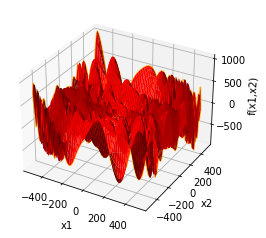

In [3]:
def plot_objective(f):
  fig=plt.figure()
  ax=plt.axes(projection='3d')
  x1=np.linspace(-512,512,100)
  x2=np.linspace(-512,512,100)
  X1,X2=np.meshgrid(x1,x2)
  ax.plot_surface(X1,X2,f(X1,X2),color='red')
  ax.plot_wireframe(X1,X2,f(X1,X2),ccount=15,rcount=15,color='orange',alpha=0.8)
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('f(x1,x2)')

plot_objective(objective_eggholder)

<ipython-input-25-8105bbaf86a9>:30: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


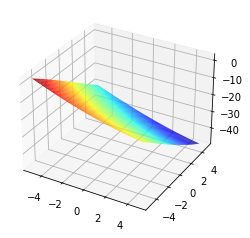

In [25]:

from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# objective_egg function
def objective(x1, x2):
  ## Find the global minimum [f(512, 404.2319) = -959.6407]
  a=np.sqrt(np.fabs(x2+x1/2+47))
  b=np.sqrt(np.fabs(x1-(x2+47)))
  return -(x2+47)*np.sin(a)-x1*np.sin(b)

# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

In [27]:
# dual annealing global optimization for objective_eggholder
from scipy.optimize import dual_annealing
from numpy.random import rand
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi

def objective(v):
  ## Find the global minimum [f(512, 404.2319) = -959.6407]
  x1 , x2 = v
  a=np.sqrt(np.fabs(x2+x1/2+47))
  b=np.sqrt(np.fabs(x1-(x2+47)))
  return -(x2+47)*np.sin(a)-x1*np.sin(b)
  

# define range for input
r_min, r_max = -500.0, 500.0
# define the bounds on the search
bounds = [[r_min, r_max], [r_min, r_max]]
# perform the dual annealing search
result = dual_annealing(objective, bounds)
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))


Status : ['Maximum number of iteration reached']
Total Evaluations: 4061
Solution: f([439.48104947 453.97748117]) = -935.33795


The main loop of the algorithm. Record the best solutions in each loop and print it out to see the progress

Show the solutions ploted on the function to check if the solution makes sense

Which algorithms is better? Write observations about algorithm performances, drawbacks, etc...

## Subproject 2: Code an algorithm that will improve the route between the cities

Traveling Salesman Problem is the most famous NP-hard benchmark problem. You get a list of cities that you need to visit and return to the start position. The better route is the one with the shortest cost.

Implement an algorithm that will improve the route on the list of given cities.

In [ ]:
# Libs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import random, operator, time, itertools, math
import numpy as np


Some helper functions

In [ ]:
def distance(city1, city2): 
    # The Euclidean distance between two cities.
    # city1 and city2 are two dimensional vectors representing coordinates
    return np.linalg.norm(city1-city2)

def total_distance(city_list, tour):
    # The total distance between each pair of consecutive cities in the tour.
    # This is your objective function
    return sum(distance(city_list[tour[i]], city_list[tour[i-1]]) 
               for i in range(len(city_list)))

c1 = np.array([0.0, 300.0])
c2 = np.array([400.0, 0.0])
distance(c1, c2)

In [ ]:
def generate_random_problem(num_cities=15):
  return [((np.random.rand(1,2) + 1) * 200) for _ in range(num_cities)]

def generate_predefined_problem():
  p = [np.array([[370, 260]]),
   np.array([[355, 378]]),
   np.array([[307, 369]]),
   np.array([[302, 399]]),
   np.array([[238, 265]]),
   np.array([[215, 333]]),
   np.array([[304, 282]]),
   np.array([[277, 207]]),
   np.array([[227, 323]]),
   np.array([[394, 314]]),
   np.array([[220, 226]]),
   np.array([[321, 333]]),
   np.array([[363, 252]]),
   np.array([[272, 257]]),
   np.array([[397, 341]])]
  return p

city_list = generate_predefined_problem()


In [ ]:
# An individual is a permutation of the indexes representing the cities in the
# `problem` list of cities

solution_1 = random.sample(list(range(len(city_list))), k=len(city_list))
print(solution_1)
total_distance(city_list, solution_1)

* Show if the solution improved over time
* Plot a radom solution and the optimized one. Is there any visible improvements over the random one? Do some transitions make more sense in the optimized solution?

In [ ]:
# Code for plotting
def plot_tour(city_list, solution, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    tour = [city_list[idx] for idx in solution]
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    # plt.show()
    
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = xy_separate(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)
    
def xy_separate(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    print(points)
    return [p[0][0] for p in points], [p[0][1] for p in points]

plot_tour(city_list, solution_1)